In [1]:
import numpy as np
import qutip as qt
from matplotlib import pyplot as plt

In [5]:
###Now we define the states/operators of the three level atom
state1,state2,state3 = qt.states.qutrit_basis() #These are the three levels of our atom

sig12 = state1*state2.dag()
sig21 = sig12.dag()
sig13 = state1*state3.dag()
sig31 = sig13.dag()

sig11 = state1*state1.dag()
sig22 = state2*state2.dag()
sig33 = state3*state3.dag()

In [4]:
###We now define the Hamiltonian 
#We first consider the case where there is no detuning; only Rabi couplings
#We also start in the Lambda scheme so that the drives are applied as 2->1, 3->1
def H(Omega2,Omega3):
    return .5*Omega2*(sig12+sig21) + .5*Omega3*(sig13+sig31)

In [6]:
###And the jump operators 
#We have Lambda which means the decays go 1->2 and 1->3
def coll(Gamma2,Gamma3):
    return [np.sqrt(Gamma2)*sig21,np.sqrt(Gamma3)*sig31]

In [12]:
###This function returns the steady state density matrix given the parameters
def rhoSS(Omega2,Omega3,Gamma2,Gamma3):
    return qt.steadystate(H(Omega2,Omega3),coll(Gamma2,Gamma3))

def pop2SS(Omega2,Omega3,Gamma2,Gamma3):
    return qt.expect( state2*state2.dag(),rhoSS(Omega2,Omega3,Gamma2,Gamma3) )

def pop3SS(Omega2,Omega3,Gamma2,Gamma3):
    return qt.expect( state3*state3.dag(),rhoSS(Omega2,Omega3,Gamma2,Gamma3) )


In [42]:
numPoints = 10 
minDrive = 0.01
maxDrive = 2.0

driveList = np.linspace(minDrive,maxDrive,numPoints)

In [32]:
def pop2SS(Omega2,Omega3,Gamma2,Gamma3):
    return qt.expect( state2*state2.dag(),rhoSS(Omega2,Omega3,Gamma2,Gamma3) )

def pop3SS(Omega2,Omega3,Gamma2,Gamma3):
    return qt.expect( state3*state3.dag(),rhoSS(Omega2,Omega3,Gamma2,Gamma3) )


In [43]:
pop2SSArray = np.zeros(shape=(numPoints,numPoints))
pop3SSArray = np.zeros(shape=(numPoints,numPoints))

In [46]:
for j in np.arange(numPoints):
    for k in np.arange(numPoints):
        pop2SSArray[j,k] = pop2SS(driveList[j],driveList[k],1.0,1.0)
        pop3SSArray[j,k] = pop3SS(driveList[j],driveList[k],1.0,1.0)

In [47]:
plt.plot(driveList,pop2SSArray[:,3])
plt.plot(driveList,pop3SSArray[:,3])

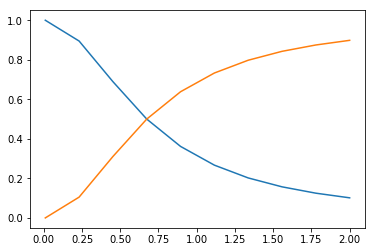

In [48]:
plt.show()